In [67]:
## move images into folders of mission and player

import json
import shutil
from os import listdir, mkdir
from os.path import isfile, isdir, join
from PyPDF2 import PdfFileMerger, PdfFileReader

old_dir = '../recordings/test_analyzer_RITA_saved/pdf/'
filtered_files = [join(old_dir, f) for f in listdir(old_dir) if isfile(join(old_dir, f)) and '.pdf' in f]

def get_trial(f):
    return int(f[f.index('ial-')+4: f.index('_Mem')])

def get_score(filtered_file):
    score_dir = old_dir.replace('pdf','json')
    with open(join(score_dir, filtered_file.replace('pdf','json'))) as f:
        score = json.load(f)['Triage']['final_score']
        return score

def move_and_folder(memberNumber):
    filter = f'Member-{memberNumber}'
    json_dir = '../recordings/test_analyzer_RITA_saved/video/'
    filtered_files = [f for f in listdir(json_dir) if isfile(join(json_dir, f)) and '.json' in f and filter in f]
    
    json_dir_new = join(json_dir, filter)
    if not isdir(json_dir_new):
        mkdir(json_dir_new)
    
    for filtered_file in filtered_files:
        shutil.move(join(json_dir, filtered_file), join(json_dir_new, filtered_file))
    
def filter_and_combine(filter, new_dir):
    blank_page = join(old_dir, 'blank.pdf')
    if not isdir(new_dir):
        mkdir(new_dir)
    
    filtered_files = [f for f in listdir(old_dir) if isfile(join(old_dir, f)) and '.pdf' in f and filter in f]
    if filter.startswith('TriageNoSignal'):
        filtered_files = [f for f in listdir(old_dir) if isfile(join(old_dir, f)) and '.pdf' in f and filter in f and 'NoTriageNoSignal' not in f]
    
    if 'Member' in filter:
        unordered_files = {join(old_dir, f): get_trial(f) for f in filtered_files}
    else:
        unordered_files = {join(old_dir, f): get_score(f) for f in filtered_files}
    
    filtered_files = [k for k, v in sorted(unordered_files.items(), key=lambda item: item[1])]
    if len(filtered_files) > 0:
        mergedObject = PdfFileMerger()
        output_file = join(new_dir, filter+'.pdf').replace('..pdf','.pdf')
        for filtered_file in filtered_files:
            mergedObject.append(PdfFileReader(filtered_file, 'rb'))
            mergedObject.append(PdfFileReader(blank_page, 'rb'))
        mergedObject.write(output_file)
        print(f'generating {output_file} with {len(filtered_files)} pages')
    
# for training in ['TriageSignal', 'TriageNoSignal', 'NoTriageNoSignal']:
#     filter_and_combine(training, '../recordings/test_analyzer_RITA_saved/by_training_print/')
    
# for mission in ['Easy-Static', 'Easy-Dynamic', 'Med-Static', 'Med-Dynamic', 'Hard-Static', 'Hard-Dynamic']:
#     filter_and_combine(mission, '../recordings/test_analyzer_RITA_saved/by_mission/')
    
for condition in [  
                    'TriageSignal_FalconEasy-Static', 'TriageSignal_FalconEasy-Dynamic',
#                     'TriageSignal_FalconMed-Static', 'TriageSignal_FalconMed-Dynamic',
#                     'TriageSignal_FalconHard-Static', 'TriageSignal_FalconHard-Dynamic',

#                     'TriageNoSignal_FalconEasy-Static',
#                     'TriageNoSignal_FalconMed-Static',
#                     'TriageNoSignal_FalconHard-Static',

                    'NoTriageNoSignal_FalconEasy-Static',
#                     'NoTriageNoSignal_FalconMed-Static',
#                     'NoTriageNoSignal_FalconHard-Static',
                 ]:
    filter_and_combine(condition, '../recordings/test_analyzer_RITA_saved/by_condition_print/')

for memberNumber in range(26, 103):
#     move_and_folder(memberNumber)
    filter_and_combine(f'Member-{memberNumber}.', '../recordings/test_analyzer_RITA_saved/by_member_print/')

generating ../recordings/test_analyzer_RITA_saved/by_condition_print/TriageSignal_FalconEasy-Static.pdf with 18 pages
generating ../recordings/test_analyzer_RITA_saved/by_condition_print/TriageSignal_FalconEasy-Dynamic.pdf with 17 pages
generating ../recordings/test_analyzer_RITA_saved/by_condition_print/NoTriageNoSignal_FalconEasy-Static.pdf with 20 pages
generating ../recordings/test_analyzer_RITA_saved/by_member_print/Member-26.pdf with 3 pages
generating ../recordings/test_analyzer_RITA_saved/by_member_print/Member-27.pdf with 3 pages
generating ../recordings/test_analyzer_RITA_saved/by_member_print/Member-28.pdf with 3 pages
generating ../recordings/test_analyzer_RITA_saved/by_member_print/Member-30.pdf with 3 pages
generating ../recordings/test_analyzer_RITA_saved/by_member_print/Member-31.pdf with 3 pages
generating ../recordings/test_analyzer_RITA_saved/by_member_print/Member-32.pdf with 3 pages
generating ../recordings/test_analyzer_RITA_saved/by_member_print/Member-33.pdf wit

In [68]:
old_dir = '../recordings/test_analyzer_RITA_saved/by_member_print/'
filtered_files = [join(old_dir, f) for f in listdir(old_dir) if isfile(join(old_dir, f)) and '.pdf' in f]
mergedObject = PdfFileMerger()
output_file = join(new_dir, 'All.pdf')
for filtered_file in filtered_files:
    mergedObject.append(PdfFileReader(filtered_file, 'rb'))
mergedObject.write(output_file)
print(f'generating {output_file} with {len(filtered_files)} pages')

generating ../recordings/test_replay_RITA/traces/All.pdf with 75 pages


In [21]:
import pandas as pd
df = pd.read_excel('io/transcripts.xlsx', keep_default_na=False)  
df

,filename,participant_id,condition_between,start_timestamp,end_timestamp,speaker,text,potential_experimenter_questions,potential_likert_responses,potential_color_responses,potential_location_responses
0,HSRData_AudioTranscript_CondBtwn-NoTriageNoSig...,93,NoTriageNoSignal,00:00:02.429,00:00:12.150,anagha mudigonda,perfect so participant 93 now has been writte...,,,,
1,HSRData_AudioTranscript_CondBtwn-NoTriageNoSig...,93,NoTriageNoSignal,00:00:12.660,00:00:32.280,anagha mudigonda,the entire experiment will take about two and ...,,,,
2,HSRData_AudioTranscript_CondBtwn-NoTriageNoSig...,93,NoTriageNoSignal,00:00:32.790,00:00:41.190,anagha mudigonda,okay and even though this experiment is conne...,,,,
3,HSRData_AudioTranscript_CondBtwn-NoTriageNoSig...,93,NoTriageNoSignal,00:00:41.790,00:00:49.560,anagha mudigonda,please turn off your cell phones close additio...,,,,
4,HSRData_AudioTranscript_CondBtwn-NoTriageNoSig...,93,NoTriageNoSignal,00:00:50.520,00:01:00.690,anagha mudigonda,also you will be asked to take over the host ...,,,,
...,...,...,...,...,...,...,...,...,...,...,...
38473,HSRData_AudioTranscript_CondBtwn-NoTriageNoSig...,55,NoTriageNoSignal,01:42:02.640,01:42:09.450,Anagha Mudigonda,scale with the non persistent with sending ext...,effort,,,
38474,HSRData_AudioTranscript_CondBtwn-NoTriageNoSig...,55,NoTriageNoSignal,01:42:12.810,01:42:13.770,Anagha Mudigonda,behind for a second,,,,
38475,HSRData_AudioTranscript_CondBtwn-NoTriageNoSig...,55,NoTriageNoSignal,01:46:16.590,01:46:18.480,Federico Scholcover,go ahead lift your hands off the mouse and ke...,,,,
38476,HSRData_AudioTranscript_CondBtwn-NoTriageNoSig...,55,NoTriageNoSignal,01:46:20.760,01:46:21.150,Federico Scholcover,thank you,,,,


In [52]:
from tqdm import tqdm
csv_dir = '../recordings/test_analyzer_RITA_saved/transcript/'
count = 0
found = 0
for memberNumber in tqdm(range(26, 103)):
    df_member = df.loc[df['participant_id'] == memberNumber][['start_timestamp', 'speaker', 'text', 'potential_experimenter_questions', 'potential_likert_responses', 'potential_color_responses', 'potential_location_responses']].reset_index(drop=True)
    last = 0
    for idx in range(len(df_member)):
        line = df_member.loc[idx]
#         for cue in ["and i think i'll be able to do it", 'in front of conference room', 'i have a system']:
#             if cue in line.text:
#                 print(memberNumber, line.text)
#         for cue in ['we will ask you a couple', 'the mission will be stopped', 'so you will not lose any mission time', 'not to hide your face', 'do not drink anything during the next', 'drink before we start']:
#             if cue in line.text and 'participant' not in line.speaker.lower():
#                 last = idx
#     df_member = df_member.truncate(before=last)
    df_member.to_csv(csv_dir + f'Member-{memberNumber}.csv') 
#     count += 1
#     found += (last != 0)
# print(f'{found} out of {count} occurances')

100%|██████████| 77/77 [00:05<00:00, 14.02it/s]


In [41]:
len(df_member)

539

In [40]:
questions = df_member[df_member.potential_experimenter_questions.str.contains('anxiety',case=False)]
for idx in questions.index:
    question = df_member.loc[idx]
    print(idx, question.speaker, question.text)
    
    answer = df_member.loc[idx-1]
    print(int(idx+1), answer.speaker, answer.text)
    print()

161  on a scale of one to seven with seven being extremely anxious how anxious  do you feel about your performance so far in the current mission 
162  on a scale of one to seven with seven being extremely confident  how confident are you that you will be able to rescue all the remaining yellow green victims before they expire 

169  let's practice another one  and make sure to answer this question early on a scale of one to seven with seven being extremely anxious how anxious  do you feel about your performance so far in the current mission 
170 Participant 102 i'm  i'm not super great with maps  and if i have a route that's planned and it ends up being collapsed  i might get a little stuck  okay 

212 Lovein Thomas okay  sorry  on a scale of one to seven with seven be extremely anxious  anxious  do you feel about your performance so far in the current position 
213 Lovein Thomas this is again 

286 Lovein Thomas okay  on a scale of one to seven seven be extremely anxious  anxious  do 

In [2]:
import pandas as pd
df = pd.read_csv('io/survey.csv', keep_default_na=False)  
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q267,Q268,Q269,Q270,Q271,SC0,SC1,gi,o,pn
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Think for a moment about the people with whom ...,Referring to those people who are very good or...,Have you ever participated in tournaments or c...,"If you have participated, please list the tour...","In those competitions, how many have you ever ...",Pre-knowledge Score,Post-knowledge Score,gi,o,pn
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID141""}","{""ImportId"":""QID142""}","{""ImportId"":""QID143""}","{""ImportId"":""QID144_TEXT""}","{""ImportId"":""QID145_TEXT""}","{""ImportId"":""SC_0dFvjllRXQzBoYR""}","{""ImportId"":""SC_7QX4UMJTXCzvJad""}","{""ImportId"":""gi""}","{""ImportId"":""o""}","{""ImportId"":""pn""}"
2,2020-08-25 17:03:18,2020-08-25 19:39:16,0,98.177.176.193,100,9357,1,2020-08-25 19:39:16,R_2xzWGETpjHRg9Dm,,...,1,2,1,Smash Bros,No,80,0,3,1/3/2,P000026
3,2020-08-26 14:23:04,2020-08-26 16:27:40,0,97.124.97.228,100,7475,1,2020-08-26 16:27:40,R_2zeeGW6vGnTFII6,,...,1,2,2,,,120,20,1,1/3/2,P000027
4,2020-08-27 13:03:25,2020-08-27 15:38:17,0,67.184.236.104,100,9291,1,2020-08-27 15:38:17,R_29taHDtqQ8TTCjE,,...,1,3,2,,,100,20,1,3/2/1,P000028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2020-10-18 13:53:27,2020-10-18 15:40:32,0,68.3.224.116,100,6424,1,2020-10-18 15:40:32,R_1i2OPGIIBJFsmnT,,...,1,2,2,,,115,20,1,2/3/1,P000098
74,2020-10-19 14:34:19,2020-10-19 16:47:59,0,68.99.201.162,100,8019,1,2020-10-19 16:47:59,R_2QFLYKTDLVh3DtP,,...,1,2,1,Platinum Heroes VI (Starcraft 2)\nJunior Star ...,yes,105,20,1,2/3/1,P000099
75,2020-10-19 16:00:49,2020-10-19 18:01:00,0,24.251.165.46,100,7210,1,2020-10-19 18:01:00,R_DICTRy41xZpBxXr,,...,1,2,1,Shiraz Game Fest - in Iran - Dota 2,1,100,20,2,2/3/1,P000100
76,2020-10-20 13:06:53,2020-10-20 15:34:29,0,70.162.5.212,100,8855,1,2020-10-20 15:34:29,R_1g5umOjBrOUQF71,,...,1,2,2,,,80,0,3,1/3/2,P000101


In [17]:
scaled[df_member.text.str.contains('anxious',case=False)]

/Users/z/miniconda3/envs/mine/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,start_timestamp,speaker,text
159,00:28:17.820,NaN,on a scale of one to seven with seven being ex...
169,00:29:38.940,Participant 90,let's practice another one oh make sure to a...
293,00:50:20.070,Verica Buchanan (ASU),thank you on a scale of one to seven or so an...
310,00:54:54.030,Verica Buchanan (ASU),thank you on a scale of one to seven seven be...
394,01:20:32.580,Verica Buchanan (ASU),thank you on a scale of one to seven seven be...
411,01:25:09.540,Verica Buchanan (ASU),thank you scale of one to seven or seven being...
425,01:29:13.290,Verica Buchanan (ASU),but i do think i'm making good time thank you...
449,01:40:03.990,Verica Buchanan (ASU),thank you on a scale of one to seven seven be...
461,01:44:09.990,Verica Buchanan (ASU),to find them thank you on a scale of one to ...
470,01:47:58.170,Verica Buchanan (ASU),like a fun cuz i know where probably michael j...


in total 34 files
('doorstep', 1000) (0.4411764705882353, 15)
('room', 2) (0.23529411764705882, 8)
('doorstep', 739) (0.058823529411764705, 2)
('doorstep', 738) (0.20588235294117646, 7)
('doorstep', 740) (0.029411764705882353, 1)
('doorstep', 1922) (0.029411764705882353, 1)
("('doorstep', 1000)", "('victim-yellow', 2697)") (0.3333333333333333, 5)
("('doorstep', 1000)", "('room', 3)") (0.6, 9)
("('doorstep', 1000)", "('doorstep', 745)") (0.06666666666666667, 1)



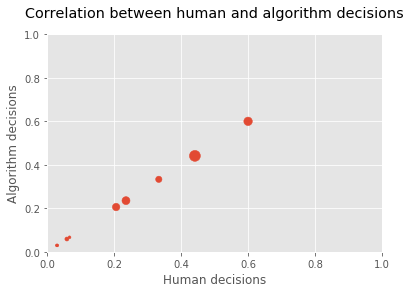

In [48]:
##### Paper Figure 3

import json
import shutil
from os import listdir, mkdir
from os.path import isfile, isdir, join
from PyPDF2 import PdfFileMerger, PdfFileReader
import matplotlib.pyplot as plt
from PIL import Image

## input json and output pdf
old_dir = '../recordings/test_achieved_macro/'
new_dir = '../recordings/test_achieved_macro/pdfs/'

## png and intermediate pdf files
img_dir = '../recordings/test_replay_RITA/viz/'
pdf_dir = '../recordings/test_replay_RITA/pdf/'

def combine(filtered_files, output_file):
    if not isfile(output_file):
        mergedObject = PdfFileMerger()
        for filtered_file in filtered_files:
            mergedObject.append(PdfFileReader(filtered_file, 'rb'))
        mergedObject.write(output_file)
#     print(f'generating {output_file} with {len(filtered_files)} pages')

def png2pdf(name):
    pdf_file = join(pdf_dir, name+'.pdf')
    img_file = join(img_dir, name+'.png')
    if not isfile(pdf_file):
        image1 = Image.open(img_file)
        im1 = image1.convert('RGB')
        im1.save(pdf_file)
    return pdf_file

filtered_files = [f for f in listdir(old_dir) if isfile(join(old_dir, f)) and '.json' in f]
print(f'in total {len(filtered_files)} files')
macros = {}
commons = {}
for f in filtered_files:
    data = json.load(open(join(old_dir, f)))
    macros[f] = list(data.keys())
    
    first = macros[f][0]
    if first not in commons:
        commons[first] = {}
    commons[first][f] = macros[f][1:]

sum_first = len(filtered_files)
counter = {}
new_commons = {}
for common in commons:
    sum_second = len(commons[common])
    counter[common] = (sum_second/sum_first, sum_second)
    if len(commons[common]) > 10:
        for f, macros in commons[common].items():
            first_two = tuple((common, macros[0]))
            if first_two not in new_commons:
                new_commons[first_two] = {}
            new_commons[first_two][f] = macros[1:]
    for new_common in new_commons:
        if new_common not in counter:
            count_second = len(new_commons[new_common])
            counter[new_common] = (count_second/sum_second, count_second)

commons.update(new_commons)

for common in commons:
    print(common, counter[common])

# x = [0, 1, 2, 3, 4, 5]
# y = [1, 2, 4, 8, 16, 32]
x = list([m[0] for m in list(counter.values())])
y = x
s = list([m[1]*8 for m in list(counter.values())])
plt.style.use('ggplot')
plt.scatter(x, y, s=s)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Human decisions')
plt.ylabel('Algorithm decisions')
# plt.title('Correlation between human and algorithm decisions')
# plt.gca().title.set_position([.5, 1.05])  
plt.savefig(join(old_dir, 'correlation.png')) 
plt.show()  
    
# ## generate pdf summaries
# for common in commons:
#     print(common, len(commons[common]))    
#     filtered_files = [png2pdf(f.replace(' ', '_').replace('.json', '_1')) for f in commons[common]]
#     output_file = join(new_dir, str(common).replace(' ', '')+'.pdf')
#     combine(filtered_files, output_file)


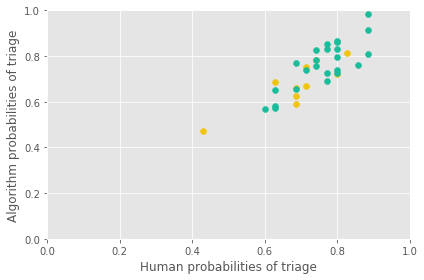

In [72]:
##### Paper Figure 4

import random
import json

noise = 0.2

data = json.load(open(join('..','recordings', 'test_aggregater_RITA', 'counts', 'TriageSignal_CondWin-FalconEasy-[35]_victims.json')))
xy = list(data['victim-yellow'].values())
xg = list(data['victim'].values())
yy = [x + random.random()*noise - noise/2 for x in xy]
yg = [x + random.random()*noise - noise/2 for x in xg]

plt.style.use('ggplot')
plt.scatter(xy, yy, color='#f1c40f')
plt.scatter(xg, yg, color='#1abc9c')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Human probabilities of triage')
plt.ylabel('Algorithm probabilities of triage')
# plt.title('Correlation between human and algorithm decisions')
# plt.gca().title.set_position([.5, 1.05])  
plt.tight_layout()
plt.savefig(join(old_dir, 'victims.png')) 
plt.show()  

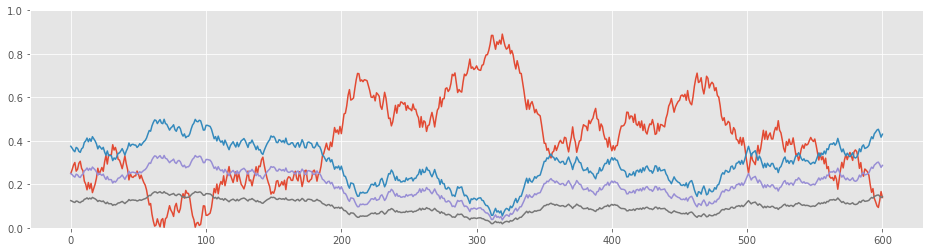

In [85]:
##### Paper Figure 5
from random import random

def random_curve(y0=0.25, xn=600, k=0.1):
    y = y0
    ys = [y]
    for x in range(xn):
        y = y + random()*k - k/2
        ys.append(y)
    return [abs(y) for y in ys]

xn = 600
x = range(xn+1)

plt.style.use('ggplot')
plt.figure(figsize=(16, 4))
plt.ylim(0,1)

y1 = random_curve(y0=0.25, xn=600, k=0.1)
plt.plot(x,y1)
y2 = [(1-y)/3 for y in y1]
plt.plot(x,y2)
plt.plot(x,y2)
plt.plot(x,y2)

plt.show()


['y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'gA', 'gB', 'gC', 'gD', 'gE', 'gF', 'gG', 'gH', 'gI', 'gJ', 'gK', 'gL', 'gM', 'gN', 'gO', 'gP', 'gQ', 'gR', 'gS', 'gT', 'gU', 'gV', 'gW', 'gX']
[0.7142857142857143, 0.6285714285714286, 0.42857142857142855, 0.8, 0.6857142857142857, 0.6857142857142857, 0.8285714285714286, 0.7142857142857143, 0.7428571428571429, 0.6857142857142857, 0.8, 0.7714285714285715, 0.7714285714285715, 0.7142857142857143, 0.8, 0.7428571428571429, 0.8, 0.8857142857142857, 0.8857142857142857, 0.8857142857142857, 0.8571428571428571, 0.8, 0.7714285714285715, 0.7714285714285715, 0.6857142857142857, 0.8, 0.6857142857142857, 0.7428571428571429, 0.6, 0.6285714285714286, 0.7428571428571429, 0.6285714285714286, 0.8, 0.6285714285714286]


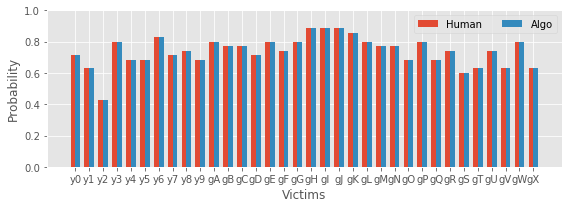

In [65]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import string
import json

labels = [f'y{a}' for a in range(10)]
labels.extend([f'g{a}' for a in list(string.ascii_uppercase)[:24]])
data = json.load(open(join('..','recordings', 'test_aggregater_RITA', 'counts', 'TriageSignal_CondWin-FalconEasy-[35]_victims.json')))

human_means = list(data['victim-yellow'].values())
human_means.extend(list(data['victim'].values()))
algo_means = human_means

print(labels)
print(human_means)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 3))
rects1 = ax.bar(x - width/2, human_means, width, label='Human')
rects2 = ax.bar(x + width/2, algo_means, width, label='Algo')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim(0, 1)
ax.set_ylabel('Probability')
ax.set_xlabel('Victims')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=2)

# def autolabel(rects):
#     """Attach a text label above each bar in *rects*, displaying its height."""
#     for rect in rects:
#         height = rect.get_height()
#         ax.annotate('{}'.format(height),
#                     xy=(rect.get_x() + rect.get_width() / 2, height),
#                     xytext=(0, 3),  # 3 points vertical offset
#                     textcoords="offset points",
#                     ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()

plt.show()

In [19]:
import collections
from tqdm import tqdm
import json
import shutil
from os import listdir, mkdir
from os.path import isfile, isdir, join

old_dir = '../recordings/test_analyzer_RITA_saved/csv/'
filtered_files = [f for f in listdir(old_dir) if isfile(join(old_dir, f)) and '.json' in f]

x_low, x_high, z_low, z_high, y_low, y_high =  (-2108, -2020, 144, 191, 60, 62)
new_dir = '../recordings/test_analyzer_RITA_saved/log/'

bad_points = {}
trace = []
for file in tqdm(filtered_files):
    
    ## read in, find strange points
    with open(join(old_dir, file)) as f:
        data = json.load(f)
        rows = data['rows']
        new_rows = []
        for row in rows:
            if row['msg']['sub_type'] == 'state':
                x, y, z = row['data']['x'], row['data']['y'], row['data']['z']
                pos = (x,y,z)
                if x >= x_low and x <= x_high and y >= y_low and y <= y_high and z >= z_low and z <= z_high:
                    new_rows.append(row)
            else:
                new_rows.append(row)
        data['rows'] = new_rows
        
        with open(join(new_dir, file), 'w') as outfile:
            json.dump(data, outfile, indent=4)

100%|██████████| 224/224 [07:04<00:00,  1.90s/it]


In [1]:
from PyPDF2 import PdfFileMerger, PdfFileReader
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pdf2image import convert_from_path
from tqdm import tqdm

old_dir = '../recordings/test_replay_RITA/viz/'
filtered_files = [f for f in listdir(old_dir) if isfile(join(old_dir, f)) and '.png' in f and '_1.png' not in f]
new_dir = '../recordings/test_replay_RITA/traces/'

pdf_dir = '../recordings/test_analyzer_RITA_saved/pdf/'
analysis_dir = '../recordings/test_replay_RITA/analysis/'

HSR_dir = join('..', '..', '..', '..', '..', '..', '..', '..', '..', 'Users', 'z', 'Dropbox (MIT)', 'study-1_2020.08-rmq', 'maps')
map_files = [join(HSR_dir, f) for f in listdir(HSR_dir) if isfile(join(HSR_dir, f)) and '.png' in f and 'Pretrial' in f]

for f in tqdm(filtered_files):
    
#     if isfile(join(new_dir, f.replace('.png', '.pdf'))):
#         continue
    
    trial = f[f.index('Trial') + 6: f.index('_Member')]
    map_f = [m for m in map_files if f'Trial-{trial}' in m]
    
#     pdf_file = join(pdf_dir, f.replace('.png', '.pdf'))
#     jpg_file = pdf_file.replace('pdf', 'jpg')
#     if not isfile(jpg_file):
#         images = convert_from_path(pdf_file)
#         images[0].save(jpg_file, 'JPEG')
#     pdf = mpimg.imread(jpg_file)
    
    img0 = mpimg.imread(join(HSR_dir, map_f[0]))
    img1 = mpimg.imread(join(old_dir, f).replace('.png', '_1.png'))
    img2 = mpimg.imread(join(old_dir, f))
    map0 = mpimg.imread(join(analysis_dir, 'FalconEasy.png'))
    
#     fig = plt.figure(figsize=(25.5, 42))

#     ax = fig.add_subplot(3, 1, 1)
#     imgplot = plt.imshow(img0)
#     ax.axis('off')
    
#     ax = fig.add_subplot(3, 1, 2)
#     imgplot = plt.imshow(img1)
#     ax.axis('off')
    
#     ax = fig.add_subplot(3, 1, 3)
#     imgplot = plt.imshow(img2)
#     ax.axis('off')

    fig = plt.figure(figsize=(84, 60))

    ax = fig.add_subplot(3, 2, 1)
    imgplot = plt.imshow(img0)
    ax.axis('off')
    
    ax = fig.add_subplot(3, 2, 2)
    imgplot = plt.imshow(img0)
    ax.axis('off')
    
    ax = fig.add_subplot(3, 2, 3)
    imgplot = plt.imshow(img1)
    ax.axis('off')
    
    ax = fig.add_subplot(3, 2, 4)
    imgplot = plt.imshow(map0)
    ax.axis('off')
    
    ax = fig.add_subplot(3, 2, 5)
    imgplot = plt.imshow(img2)
    ax.axis('off')
    
    ax = fig.add_subplot(3, 2, 6)
    imgplot = plt.imshow(map0)
    ax.axis('off')
    
    fig.tight_layout() 
    plt.savefig(join(new_dir, f.replace('.png', '.pdf'))) 

blank_page = join(new_dir, 'blank.pdf')
fig = plt.figure(figsize=(84, 60))
plt.savefig(blank_page) 

for condition in ['NoTriageNoSignal_FalconEasy-Static', 'TriageSignal_FalconEasy-Static', 'TriageSignal_FalconEasy-Dynamic']: ## 
    files = [f for f in filtered_files if condition in f]
    mergedObject = PdfFileMerger()
    output_file = join(new_dir, condition+'.pdf')
    for filtered_file in filtered_files:
        mergedObject.append(PdfFileReader(join(new_dir, filtered_file.replace('.png', '.pdf')), 'rb'))
        mergedObject.append(PdfFileReader(blank_page, 'rb'))
    mergedObject.write(output_file)
    print(f'generating {output_file} with {len(files)} pages')

In [202]:
[r1(n) for n in np.logspace(-0.3, 1.7, num=10, base=10)]

[0.5, 0.8, 1.4, 2.3, 3.9, 6.5, 10.8, 18.0, 30.0, 50.1]

In [226]:
from PyPDF2 import PdfFileMerger, PdfFileReader
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pdf2image import convert_from_path
from tqdm import tqdm
import json
import shutil
from os import listdir, mkdir
from os.path import isfile, isdir, join
import sys
import numpy as np
from pprint import pprint


# trial = 'player3'
# old_dir = '../recordings/test_achieved_macro/saved/3 players test3/json/'

verbose = False
xn = 600 ## 200  ## 
maze = 'easy' ## 'test3'  ## 
taus = [r1(n) for n in np.logspace(-0.3, 1.7, num=10, base=10)] 
## [0.5, 0.8, 1.4, 2.3, 3.9, 6.5, 10.8, 18.0, 30.0, 50.1]
# player_name = 'player14'
old_dir = f'../recordings/test_inv_{maze}/uir/json/'
new_dir = f'../recordings/test_inv_{maze}/uir/plots/'
player_names = set([f[1: f.index(' ')] for f in listdir(old_dir) if isfile(join(old_dir, f)) if maze in f.lower()])
qvalue = []

###---------------------------------------------------------------------------

def get_planner_name(fn):
    return fn[fn.index('Planner-')+8: fn.index('.json')]

def r1(num):
    return round(num, 1)

def r3(num):
    return round(num, 3)

def plot_posterior(player_name, planner_names, taus, gamma=0.9, window = 6):
    
    def exp_decay(l, gamma=gamma, window = window):
        decayed = [l[i] * gamma**(len(l) - i - 1) for i in range(len(l))]
        window = min(len(l), window)
        truncated = decayed[-window:]
        return truncated
    
    filtered_files = [f for f in listdir(old_dir) 
                      if isfile(join(old_dir, f)) and maze in f.lower() and player_name in f and 'Planner-tester' not in f]
    all_planners = {get_planner_name(f): json.load(open(join(old_dir, f))) for f in filtered_files}
    
    planners = {p:data for p,data in all_planners.items() if p in planner_names}
    planners = dict(sorted(planners.items()))
    planner_names.sort()
    likelihoods = {planner: {tau: {} for tau in taus} for planner in planners}
    posteriors = {planner: {tau: {} for tau in taus} for planner in planners}
    countdowns = []

    ## for all macros achieved
    for macro_achieved, comments in json.load(open(join(old_dir, filtered_files[0]))).items():
        countdown_achieved = r1(comments['countdown'])
        if verbose: print(countdown_achieved, macro_achieved) ## , ' -> ', comments['goal']
        correct_predictions = comments['correct_predictions']

        ## for all player types (different horizon & belief)
        for planner, chunk in planners.items():
            if verbose: print(f'   planner ->', planner)
            if macro_achieved not in chunk: 
                continue
                
#             proposed = chunk[macro_achieved]['proposed']
#             print(list(proposed.keys()))
#             proposed = dict(sorted(proposed.items(), key=lambda item: float(item[0]))) ## , reverse=True
#             print(list(proposed.keys()))
            
            ## for all decision points after the last achieved macro
            for countdown, proposals in chunk[macro_achieved]['proposed'].items():
                
                ## not consider the countdown if proposal is victim and victim is not one of the proposal
                if 'victim' in macro_achieved and len(set(correct_predictions).intersection(set(proposals.keys()))) == 0:
                    continue

                countdown = round(float(countdown), 1)
                if verbose: print('    ', countdown)
                for proposed_macro, data in proposals.items():
                    correct = proposed_macro in correct_predictions
                    if verbose: print(f"       {proposed_macro}  |  q = {r3(data['q'])}  |  {correct}")
                    qvalue.append(data['q'])

                ## for all softmax that we want
                for tau in taus:

                    ## given all macros proposed
                    q_sum = 0
                    q = 1 ## if macro_achieved is not in macros_proposed, make it a small q of 1
                    for proposed_macro, data in proposals.items():
                        correct = proposed_macro in correct_predictions
                        q_sum += np.exp(data['q'] / tau)
                        if correct: q = np.exp(data['q'] / tau)

                    ## calculate likelihood with softmax
                    likelihood = q / q_sum
                    likelihoods[planner][tau][countdown] = likelihood

                    ## calculate posterior with expo decay window
                    ps = [r3(l) for l in list(likelihoods[planner][tau].values())]
                    ps_decayed = exp_decay(list(likelihoods[planner][tau].values()))
                    posterior = np.prod(ps_decayed) ##sum([np.log(n) for n in ps_decayed])
                    posteriors[planner][tau][countdown] = posterior

                    ## print out the new likelihood and posterior
                    if verbose: print(f"          tau = {tau}  |  likelihood = {r3(likelihood)}  |  likelihoods = {ps}  |  posterior = {r3(posterior)}") ##  = {r3(q)} / {r3(q_sum)}
                    
                    countdowns = list(posteriors[planner][tau].keys())
#         break
        if verbose: print()
    
#     countdowns.sort()
#     countdowns.reverse()
#     print(countdowns)
    ps_sum = {cd:0 for cd in countdowns}
    lh_sum = {cd:0 for cd in countdowns}
    ps_top_type = {cd:[] for cd in countdowns}
    lh_top_type = {cd:[] for cd in countdowns}
    ps_top_value = {cd:-np.inf for cd in countdowns}
    lh_top_value = {cd:-np.inf for cd in countdowns}
    for planner in planners:  
        for tau in taus:
            if len(planners) == 1:
                label = f"t={tau}"
            elif len(taus) == 1:
                label = f"{planner.replace('ma*-','')}"
                
            for cd in countdowns:
                ps = posteriors[planner][tau][cd]
                lh = likelihoods[planner][tau][cd]
                ps_sum[cd] += ps
                lh_sum[cd] += lh
                if ps >= ps_top_value[cd]:
                    if ps > ps_top_value[cd]:
                        ps_top_value[cd] = ps
                        ps_top_type[cd] = []
                    ps_top_type[cd].append(label)
                if lh >= lh_top_value[cd]:
                    if lh > lh_top_value[cd]:
                        lh_top_value[cd] = lh
                        lh_top_type[cd] = []
                    lh_top_type[cd].append(label) 
    ps_top = []
    lh_top = []
    
    last_n = None
    for n in list(ps_top_type.values()):
        if n != last_n:
            ps_top.append(n)
        last_n = n
    last_n = None
    for n in list(lh_top_type.values()):
        if n != last_n:
            lh_top.append(n)
        last_n = n
    
    ps_top = str(ps_top).replace('(','').replace(')','').replace(', ',' ')
    lh_top = str(lh_top).replace('(','').replace(')','').replace(', ',' ')
    ps_top = ps_top.replace('ma*-',' ').replace("'",'')
    lh_top = lh_top.replace('ma*-',' ').replace("'",'')
    
    ys_ps = {} ## (planner, tau): []
    ys_lh = {} ## (planner, tau): []
    for planner in planners:  
        for tau in taus:
    #         ps = {c: r3(p) for c, p in posteriors[planner][tau].items()}
    #         print(f'\n{planner}  tau = {tau}  |  curve: {ps}')
    #         ps = {c: r3(p)/ps_sum[c] for c, p in posteriors[planner][tau].items()}
            ys_ps[(planner, tau)] = [r3(p/ps_sum[c]) for c, p in posteriors[planner][tau].items()]
            ys_lh[(planner, tau)] = [r3(p/lh_sum[c]) for c, p in likelihoods[planner][tau].items()]
    
    ps_top_value = {c:p/ps_sum[c] for c, p in ps_top_value.items()}
    lh_top_value = {c:l/lh_sum[c] for c, l in lh_top_value.items()}

    x = [xn-c for c in countdowns]
#     print(countdowns)
    for stat in [ys_lh, ys_ps]:
        if stat == ys_lh: 
            title = "Likelihoods"
            subtitle = lh_top
            top_value = lh_top_value
            top_label = lh_top_type
        elif stat == ys_ps: 
            title = "Posteriors"
            subtitle = ps_top
            top_value = ps_top_value
            top_label = ps_top_type

        legends = [str(k).replace("('ma*-h",'horizon=').replace("', ",', tau=').replace(")",'') for k in ys_ps]
        
        plt.style.use('ggplot')
        plt.figure(figsize=(32, 8)) ## figsize=(16, 4))
        plt.xticks(x)
        locs, labels = plt.xticks()
        plt.xticks(locs, countdowns)
        plt.xlabel('Countdown (sec)')
        plt.ylabel(title)

#         stat = dict(sorted(stat.items(), key=lambda item: item[1], reverse=True))
#         print(x)
#         print(list(stat.keys()))
#         print(list(top_value.keys()))
        
        for k, v in stat.items():
#             print(k, v)
            plt.plot(x, v)
    
        # zip joins x and y coordinates in pairs
#         for x1,y1 in zip(x, top_value):
        for x1 in x:
            cd = round(xn-x1,1)
            y1 = top_value[cd]
            label = str(top_label[cd]).replace("'","") ##"{:.2f}".format(y)

            plt.annotate(label, # this is the text
                         (x1,y1), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,0.1), # distance from text to points (x,y)
                         ha='center' # horizontal alignment can be left, right or center
                        ) 
        plt.legend(legends)
        title += f":  trial={player_name}  planners={planner_names}  taus={taus}  gamma={gamma}  window={window}"
        title = title.replace('ma*-','')
        plt.title(f"{title}\nMost likely types:  {subtitle}")
        plt.tight_layout()
#         plt.show()
        plt.savefig(join(new_dir, title+'.png') )
        plt.close()
#         sys.exit()
    
planner_names = list(planners.keys())
qvalues = {p:[] for p in planner_names}
for player_name in ['Member-26']: ##player_names:  ## 
#     if player_name == 'player1': continue
    print(player_name)
    for tau in taus:
        print('  tau =',tau)
        plot_posterior(player_name, planner_names, [tau])
#         break
    for planner_name in planner_names:
        print('  planner_name =',planner_name)
        plot_posterior(player_name, [planner_name], taus)
#         break
#     break

player12
  tau = 0.5
  tau = 0.8
  tau = 1.4
  tau = 2.3
  tau = 3.9
  tau = 6.5
  tau = 10.8
  tau = 18.0
  tau = 30.0
  tau = 50.1
  planner_name = ma*-h12
  planner_name = ma*-h2
  planner_name = ma*-h3
  planner_name = ma*-h4
  planner_name = ma*-h5
  planner_name = ma*-h7
  planner_name = ma*-h9
player4
  tau = 0.5
  tau = 0.8
  tau = 1.4
  tau = 2.3
  tau = 3.9
  tau = 6.5
  tau = 10.8
  tau = 18.0
  tau = 30.0
  tau = 50.1
  planner_name = ma*-h12
  planner_name = ma*-h2
  planner_name = ma*-h3
  planner_name = ma*-h4
  planner_name = ma*-h5
  planner_name = ma*-h7
  planner_name = ma*-h9
player3
  tau = 0.5
  tau = 0.8
  tau = 1.4
  tau = 2.3
  tau = 3.9
  tau = 6.5
  tau = 10.8
  tau = 18.0
  tau = 30.0
  tau = 50.1
  planner_name = ma*-h12
  planner_name = ma*-h2
  planner_name = ma*-h3
  planner_name = ma*-h4
  planner_name = ma*-h5
  planner_name = ma*-h7
  planner_name = ma*-h9
player14
  tau = 0.5
  tau = 0.8
  tau = 1.4
  tau = 2.3
  tau = 3.9
  tau = 6.5
  tau = 10.8
  

KeyError: 199.5

In [58]:
ps_sum

{199.5: 0,
 199.0: 0,
 196.5: 0,
 177.1: 0,
 171.9: 0,
 169.8: 0,
 160.1: 0,
 155.1: 0,
 151.8: 0,
 146.4: 0,
 137.1: 0,
 130.0: 0,
 124.8: 0,
 118.7: 0,
 113.7: 0,
 106.4: -721.2607493405321}